<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/221224_Moving_Average_Chart_with_Prediction_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
from datetime import date, timedelta

from fbprophet import Prophet

In [4]:
ticker = 'AAPL'

In [5]:
historic = yf.download(ticker, period='5y')
historic

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-26,42.700001,42.867500,42.419998,42.642502,40.548744,132742000
2017-12-27,42.525002,42.695000,42.427502,42.650002,40.555874,85992800
2017-12-28,42.750000,42.962502,42.619999,42.770000,40.669991,65920800
2017-12-29,42.630001,42.647499,42.305000,42.307499,40.230190,103999600
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.950497,102223600
...,...,...,...,...,...,...
2022-12-19,135.110001,135.199997,131.320007,132.369995,132.369995,79592600
2022-12-20,131.389999,133.250000,129.889999,132.300003,132.300003,77432800
2022-12-21,132.979996,136.809998,132.750000,135.449997,135.449997,85928000


In [6]:
historic.reset_index(drop=False, inplace=True)
historic.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-26,42.700001,42.867500,42.419998,42.642502,40.548744,132742000
1,2017-12-27,42.525002,42.695000,42.427502,42.650002,40.555874,85992800
2,2017-12-28,42.750000,42.962502,42.619999,42.770000,40.669991,65920800
3,2017-12-29,42.630001,42.647499,42.305000,42.307499,40.230190,103999600
4,2018-01-02,42.540001,43.075001,42.314999,43.064999,40.950497,102223600


In [7]:
data = historic[['Date', 'Close']]
data.head()

,Date,Close
0,2017-12-26,42.642502
1,2017-12-27,42.650002
2,2017-12-28,42.770000
3,2017-12-29,42.307499
4,2018-01-02,43.064999


In [8]:
cols = [i.lower() for i in data.columns]
data.columns = cols

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   close   1259 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB


In [10]:
data['SMA20'] = data['close'].rolling(20, min_periods=1).mean()

<ipython-input-10-66e768a11755>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA20'] = data['close'].rolling(20, min_periods=1).mean()


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   close   1259 non-null   float64       
 2   SMA20   1259 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 29.6 KB


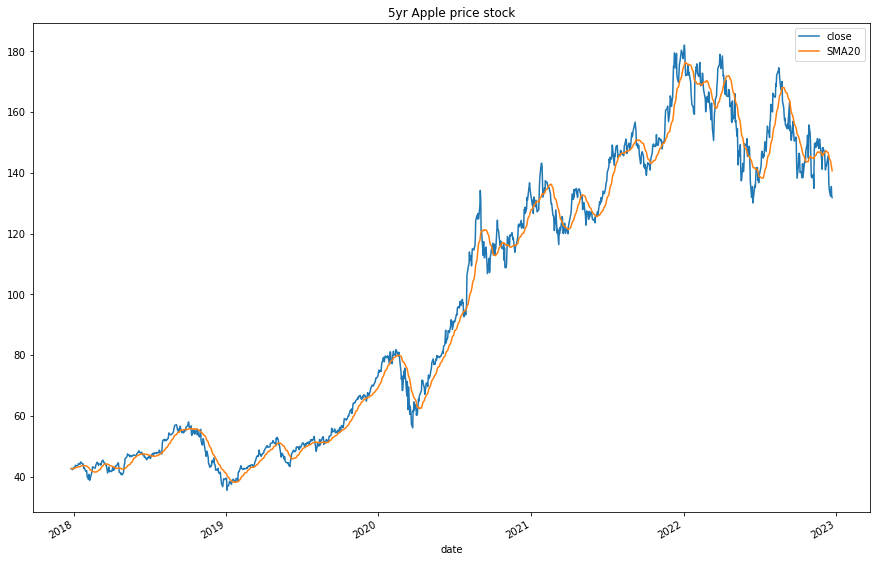

In [21]:
data.plot(figsize=(15,10), title='5yr Apple price stock')

In [26]:
df = data.reset_index(drop=False).drop('SMA20', axis=1).rename(columns={'date':'ds', 'close':'y'})
df.head()

,ds,y
0,2017-12-26,42.642502
1,2017-12-27,42.650002
2,2017-12-28,42.770000
3,2017-12-29,42.307499
4,2018-01-02,43.064999


In [27]:
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=30)
future

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
0,2017-12-26
1,2017-12-27
2,2017-12-28
3,2017-12-29
4,2018-01-02
...,...
1284,2023-01-18
1285,2023-01-19
1286,2023-01-20
1287,2023-01-21


In [30]:
forecast = model.predict(future)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast.head()

,ds,yhat,yhat_lower,yhat_upper
0,2017-12-26,42.110141,34.487021,49.583753
1,2017-12-27,42.405891,34.686162,49.777780
2,2017-12-28,42.454010,35.110818,49.840529
3,2017-12-29,42.537442,34.858223,50.212927
4,2018-01-02,43.709384,36.336934,51.004443
